# Clustering Problem

### Importing the libraries

In [294]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')
np.random.seed(42)

Showing all columns

In [295]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

### Loading the Data

In [296]:
data = pd.read_csv('marketing_clustering.csv', sep='\t')
print("Number of datapoints: ", len(data))

Number of datapoints:  2240


In [297]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### Data Cleaning

In [298]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

As you see there are some points to handle:
* missing values
* Dt_customer should be datatime format not as object
* Encoding some data

#### Handling Missing values

In [299]:
data.describe()
print(data['Income'].median())

# replace missing values with median
data['Income'] = data['Income'].fillna(data['Income'].median())
print(len(data))

51381.5
2240


In [300]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### Changing Dt_customer object(string) type to DateTime format

In [301]:
data['Dt_Customer']

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [302]:
from datetime import datetime

errors = []
for index, date_str in enumerate(data['Dt_Customer']):
    try:
        date = datetime.strptime(date_str, '%d-%m-%Y')
        # print(date)
    except ValueError:
        # print(f"Error: {e} - Date string '{date_str}' doesn't match the format '%d-%m-%Y'")
        errors.append(index)
print(errors)


[]


In [303]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')
dates = []

for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)

In [304]:
# dates

In [305]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


#### Now we will find out that each customer, how long been our customer (first_sale_date - each_date):

In [306]:
days = []
first_day = max(dates)

for i in dates:
    day_count = first_day - i
    days.append(day_count)


In [307]:
days

[datetime.timedelta(days=663),
 datetime.timedelta(days=113),
 datetime.timedelta(days=312),
 datetime.timedelta(days=139),
 datetime.timedelta(days=161),
 datetime.timedelta(days=293),
 datetime.timedelta(days=593),
 datetime.timedelta(days=417),
 datetime.timedelta(days=388),
 datetime.timedelta(days=108),
 datetime.timedelta(days=226),
 datetime.timedelta(days=593),
 datetime.timedelta(days=226),
 datetime.timedelta(days=226),
 datetime.timedelta(days=627),
 datetime.timedelta(days=582),
 datetime.timedelta(days=552),
 datetime.timedelta(days=667),
 datetime.timedelta(days=458),
 datetime.timedelta(days=603),
 datetime.timedelta(days=690),
 datetime.timedelta(days=539),
 datetime.timedelta(days=553),
 datetime.timedelta(days=169),
 datetime.timedelta(days=468),
 datetime.timedelta(days=543),
 datetime.timedelta(days=398),
 datetime.timedelta(days=494),
 datetime.timedelta(days=394),
 datetime.timedelta(days=219),
 datetime.timedelta(days=38),
 datetime.timedelta(days=414),
 datetime

In [308]:
data['Customer_days'] = np.asarray(days)

In [309]:
data['Customer_days'] = data['Customer_days'].dt.days

In [310]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [311]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,381
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,19
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,155
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,156


In [312]:
data.shape

(2240, 30)

In [313]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_days
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,663
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,113
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,312
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,139
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,161


#### Handling the categorical data
* Martial_status
* Education

In [314]:
data['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [315]:
# data['With_Partner'] = data['Marital_Status'].replace({
#     'Married':1,
#     'Together':1,
#     'Single':0,
#     'Divorced':0,
#     'Widow':0,
#     'Alone':0,
#     'Absurd':0,
#     'Yolo':0
# })

data['With_Partner'] = np.where(data['Marital_Status'].isin(['Married', 'Together']), 1, 0)
data = data.drop('Marital_Status', axis=1)

In [316]:
data['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [317]:
data["Education"] = data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

order = {'Undergraduate': 0,
         'Graduate': 1,
         'Postgraduate': 2}
data['Education'] = data['Education'].map(order)

education_encoder = LabelEncoder()
education_encoder.fit(data['Education'])
data['Education'] = education_encoder.transform(data['Education'])

print(data['Education'].value_counts())

Education
1    1127
2     856
0     257
Name: count, dtype: int64


##### We create new column as age and we keep the ages of our customers (delete Year_Birth)

In [318]:
data['Age'] = datetime.now().year - data['Year_Birth']

# We drop some columns
data = data.drop(['Year_Birth', 'ID', 'Z_CostContact', 'Dt_Customer'], axis=1)

# change some column names
new_column_names = ['AcceptedCampaign' + str(index) if 'AcceptedCmp' in col else 'CustomerComplaint' if col == 'Complain' else col for index, col in enumerate(data.columns)]

# Rename the columns using list comprehension
data.columns = new_column_names


##### We create new column as Spent and collects all amount of bought products

In [319]:
Mnt_lists = data.columns[data.columns.str.startswith('Mnt')].tolist()
Mnt_lists

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [320]:
data['Spent'] = 0

for x in data[Mnt_lists]:
    data['Spent'] += data[x]

##### We create new columns to represent:
* amount of children
* family_size
* is this person (ID) parent or not?

In [321]:
data = data.drop('Z_Revenue', axis=1)
data['Children'] = data['Kidhome'] + data['Teenhome']

data['Family_Size'] = data['With_Partner'].replace({1:2, 0:1}) + data['Children']

data['Is_Parent'] = np.where(data['Children']>0, 1, 0)

In [322]:
data.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign16,AcceptedCampaign17,AcceptedCampaign18,AcceptedCampaign19,AcceptedCampaign20,CustomerComplaint,Response,Customer_days,With_Partner,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1.267411,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107,353.582143,0.644643,54.194196,605.798214,0.950446,2.595089,0.715179
std,0.652347,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274,202.122512,0.478728,11.984069,602.249288,0.751803,0.906959,0.451430
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000,0.000000,1.000000,0.000000
25%,1.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.750000,0.000000,46.000000,68.750000,0.000000,2.000000,0.000000
50%,1.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.500000,1.000000,53.000000,396.000000,1.000000,3.000000,1.000000
75%,2.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,1.000000,64.000000,1045.500000,1.000000,3.000000,1.000000
max,2.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,1.000000,130.000000,2525.000000,3.000000,5.000000,1.000000


### Plotting some data to see the OUTLIERS of our data or Errors of the data

Relative Plot of some subset of the data


<Figure size 800x550 with 0 Axes>

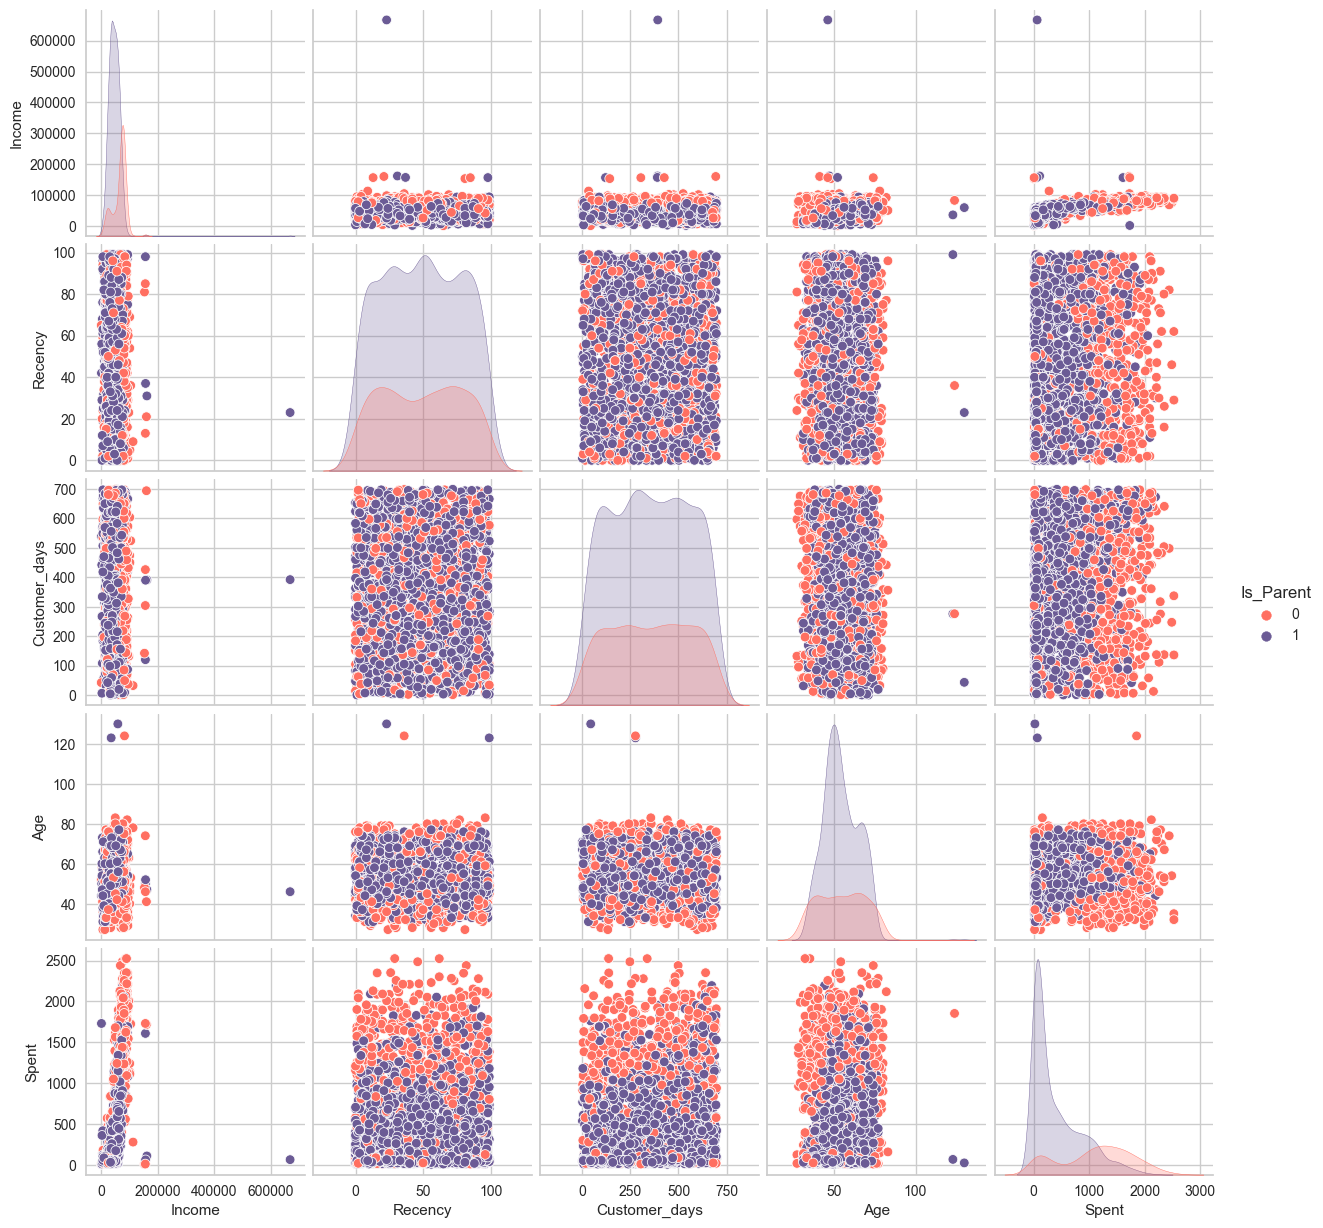

In [323]:
plotting = ['Income', 'Recency', 'Customer_days', 'Age', 'Spent', 'Is_Parent']
print("Relative Plot of some subset of the data")
plt.figure()
sns.pairplot(data[plotting], hue='Is_Parent', palette=['#FF6F61', '#6B5B95'])

plt.show()

##### There are some outliers in Income and Age columns, we should handle these data

In [324]:
bef_out = len(data)
data = data[data['Age'] < 90]
data = data[data['Income'] < 300000]

print(f"Before removing the data we had : {bef_out}, now we have {len(data)} amount of data")

Before removing the data we had : 2240, now we have 2236 amount of data


### Correlation matrix

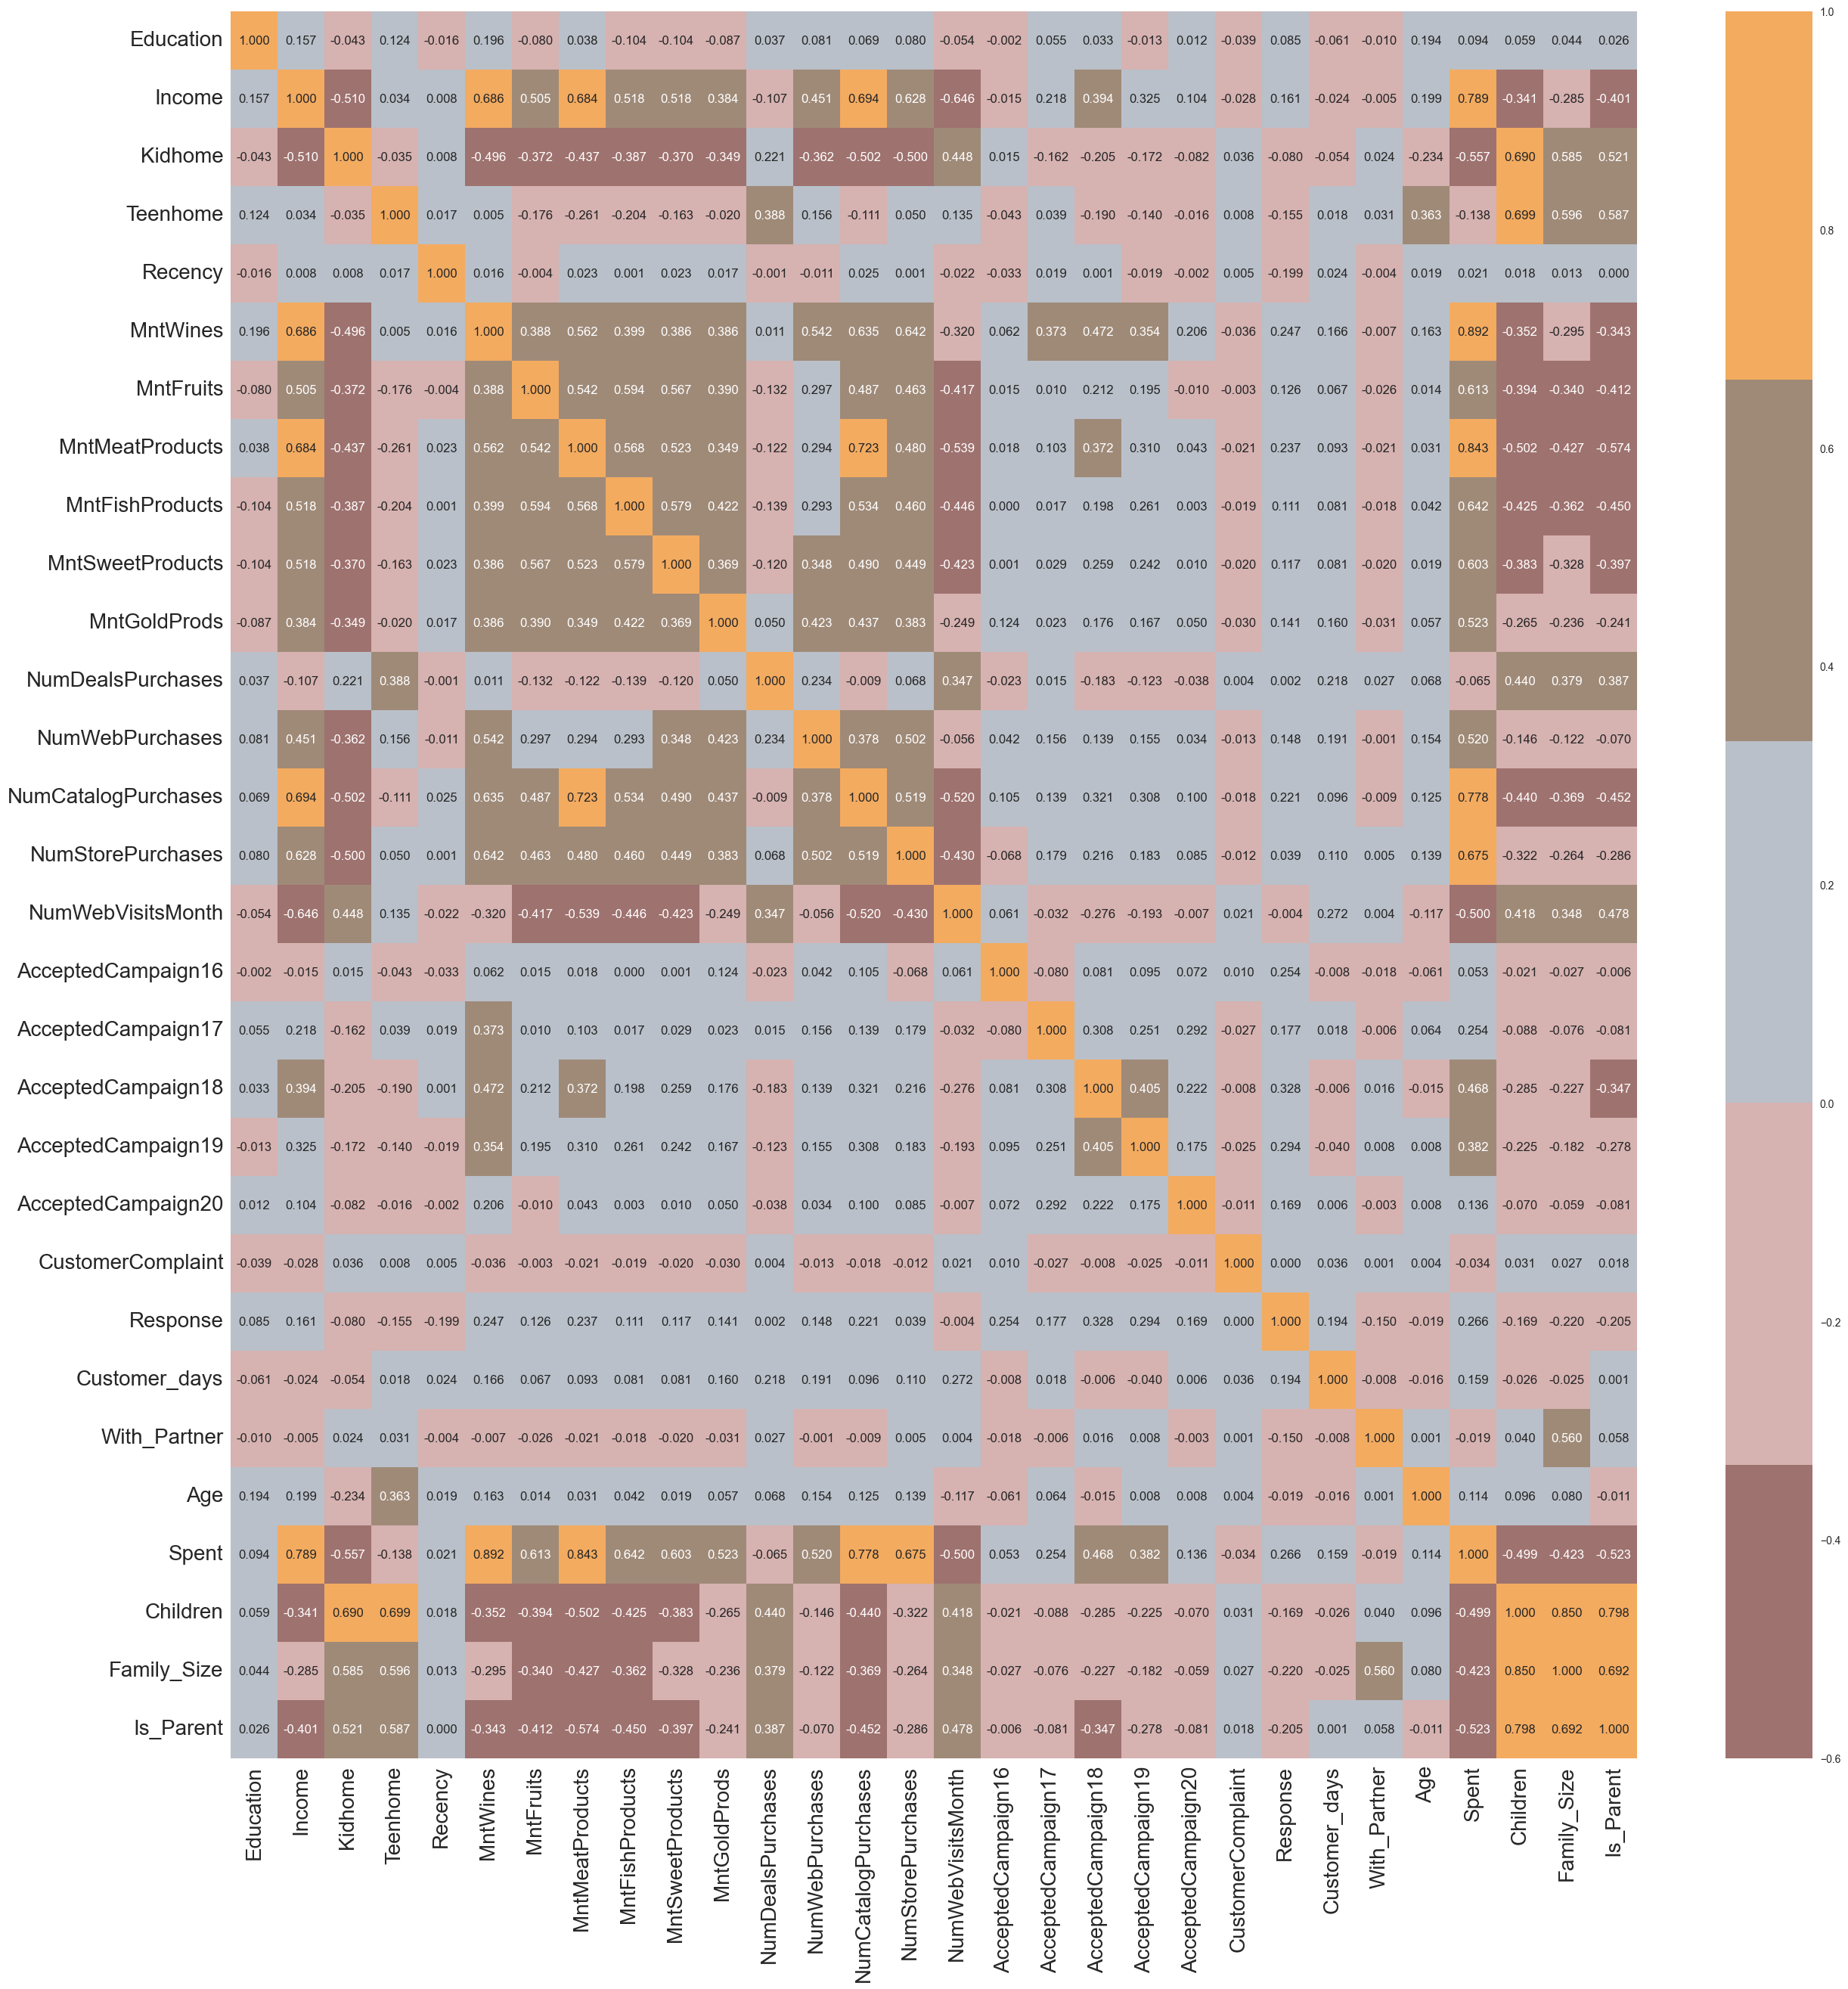

In [325]:
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
correlation_matrix = data.corr()

plt.figure(figsize=(30, 30))  # Normalizing the figure size for better visibility
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, vmin=-0.6, vmax=1, fmt=".3f")  # Ensuring equal aspect ratio

heatmap.set_xticklabels(heatmap.get_xmajorticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_ymajorticklabels(), fontsize=20)

plt.show()


### Data Preprocessing

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int64  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   MntWines             2236 non-null   int64  
 6   MntFruits            2236 non-null   int64  
 7   MntMeatProducts      2236 non-null   int64  
 8   MntFishProducts      2236 non-null   int64  
 9   MntSweetProducts     2236 non-null   int64  
 10  MntGoldProds         2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   int64 

#### data is numeric great, but in preprocessing part:
* we need to scale our data
* creating subset data for dimensionalty reduction

In [327]:
ds = data.copy()
cols_del = ['AcceptedCampaign16', 'AcceptedCampaign17', 'AcceptedCampaign18', 'AcceptedCampaign19', 'AcceptedCampaign20', 'CustomerComplaint', 'Response']

ds = ds.drop(cols_del, axis=1) # we don't delete these columns because this data doesn't need to be scaled (they are for clustering)
# Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_data = pd.DataFrame(scaler.transform(ds), columns=ds.columns)

print("All data is scaled numeric data, ready for dimensionality reduction")

All data is scaled numeric data, ready for dimensionality reduction


In [328]:
scaled_data.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_days,With_Partner,Age,Spent,Children,Family_Size,Is_Parent
0,-0.411891,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,0.845669,0.348738,1.407639,2.509801,-0.552429,0.692865,1.529793,-1.347635,1.016868,1.680176,-1.264308,-1.758810,-1.584362
1,-0.411891,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,-0.729742,-0.168700,-1.110921,-0.568970,-1.167738,-0.131421,-1.191143,-1.347635,1.273264,-0.962202,1.395139,0.445618,0.631169
2,-0.411891,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,-0.038098,-0.686137,1.407639,-0.226884,1.293496,-0.543564,-0.206659,0.742041,0.333146,0.282541,-1.264308,-0.656596,-1.584362
3,-0.411891,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,-0.748954,-0.168700,-0.751127,-0.911056,-0.552429,0.280722,-1.062517,0.742041,-1.290693,-0.918994,0.065416,0.445618,0.631169
4,1.123090,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,-0.556831,1.383614,0.328256,0.115201,0.062879,-0.131421,-0.953679,0.742041,-1.034298,-0.305762,0.065416,0.445618,0.631169


### Dimensionality Reduction

In [329]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
PCA_data = pd.DataFrame(pca.transform(scaled_data), columns=['Col1', 'Col2', 'Col3', 'Col4'])

print(PCA_data.describe().T)

       count          mean       std       min       25%       50%       75%  \
Col1  2236.0  1.207541e-16  2.872445 -5.947153 -2.530770 -0.777009  2.411719   
Col2  2236.0  4.448836e-17  1.716879 -4.270083 -1.324233 -0.152637  1.240187   
Col3  2236.0 -1.429983e-17  1.255486 -3.985682 -0.851894 -0.008866  0.827556   
Col4  2236.0  3.574958e-17  1.179614 -3.335829 -0.820467 -0.071231  0.796604   

           max  
Col1  7.487327  
Col2  6.276705  
Col3  5.799511  
Col4  3.504966  


##### Impact on Clustering if we decrease n_components value:
* Variance vs. Noise: Fewer components might mean losing some noise from the data, which can sometimes improve clustering by focusing on the more relevant features. On the other hand, if the removed components contained essential information, it might reduce the quality of clusters.

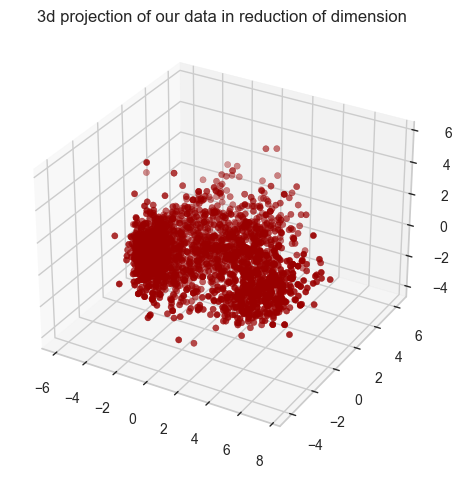

In [330]:
# A 3d projection of our data in reduction of dimension
x = PCA_data['Col1']
y = PCA_data['Col2']
z = PCA_data['Col3']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='#990000', marker='o')
ax.set_title("3d projection of our data in reduction of dimension")
plt.show()

## Clustering

* the Elbow Method to determine the number of clusters

Elbow Method to determine the number of clusters to be formed:


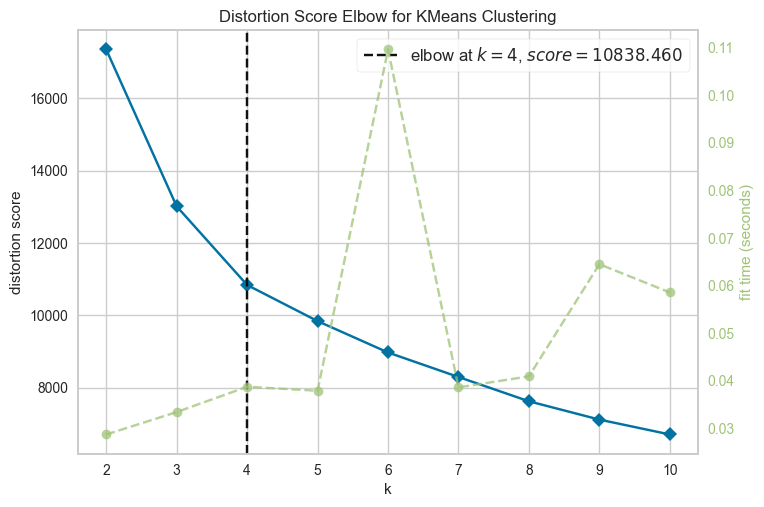

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [331]:
print('Elbow Method to determine the number of clusters to be formed:')
elbow_method = KElbowVisualizer(KMeans(), k=10)
elbow_method.fit(PCA_data)
elbow_method.show()

##### Or we can use for loop and KMeans algorithm to visualize the elbow

In [332]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(i)
    kmeans.fit(PCA_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

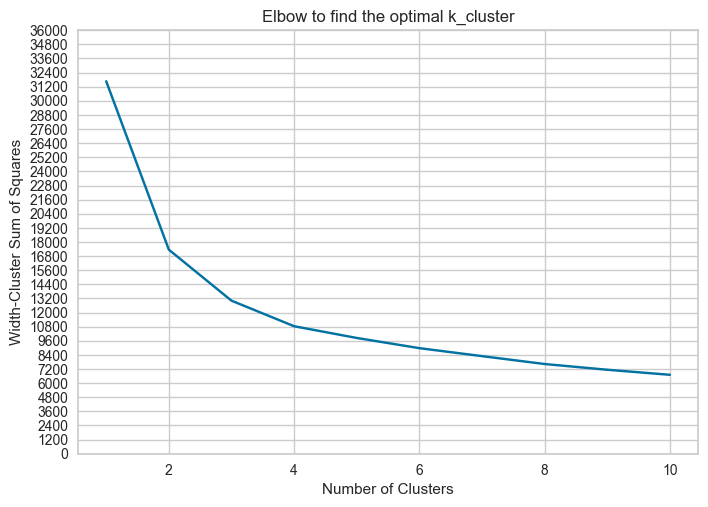

In [333]:
number_clusters = range(1,11)
plt.plot(number_clusters, wcss)
plt.title("Elbow to find the optimal k_cluster")
plt.ylabel('Width-Cluster Sum of Squares')
plt.xlabel('Number of Clusters')

plt.yticks(range(0, int(max(wcss)) + 5000, 1200))
plt.show()

# we get that the optimal changing is in maximum between 3 and 4 cluster that's why we choose 4

### Hierarchical Aggromerative Clustering

In [334]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
clustered_AC = agg_cluster.fit_predict(PCA_data)
PCA_data['Clusters'] = clustered_AC

# Adding the Agg_Cluster's clusters to original data
data['Clusters'] = clustered_AC

Text(0.5, 0.92, 'Clustered data representation as 3d')

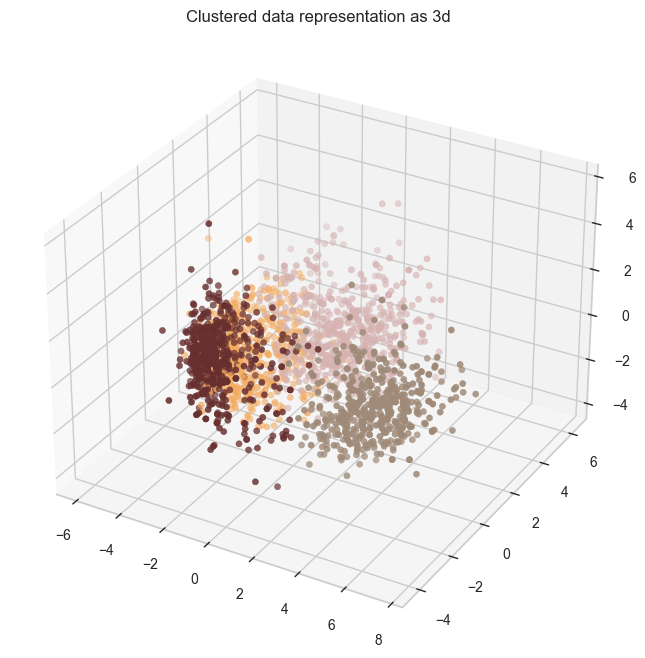

In [335]:
# Plotting the clusters in the 3d graph
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=PCA_data['Clusters'], marker='o', cmap = cmap)
ax.set_title("Clustered data representation as 3d")

In [336]:
kmeans_model = KMeans(n_clusters=4)
clustered_kmeans = kmeans_model.fit_predict(PCA_data)
PCA_data['Clusters2'] = clustered_kmeans

# Adding the KMeans's clusters to original data
data['Clusters2'] = clustered_kmeans

### Evaluating the model

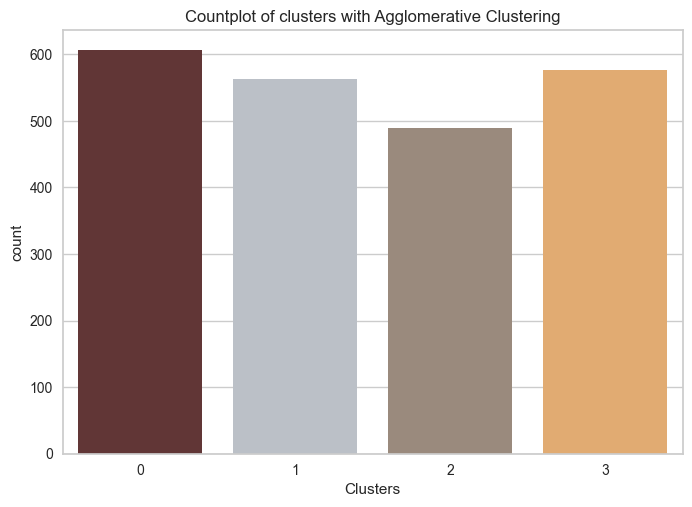

In [337]:
pallet = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data['Clusters'], palette=pallet)
pl.set_title('Countplot of clusters with Agglomerative Clustering')
plt.show()

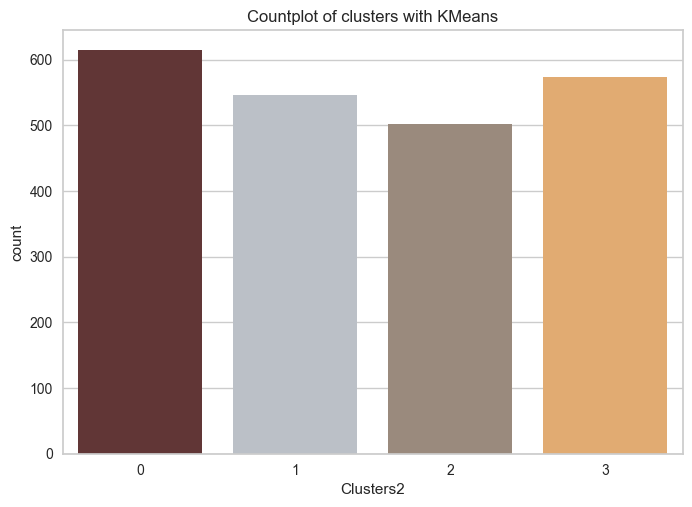

In [338]:
pallet = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data['Clusters2'], palette=pallet)
pl.set_title('Countplot of clusters with KMeans')
plt.show()

In [339]:
data['Clusters'].value_counts()

Clusters
0    606
3    577
1    563
2    490
Name: count, dtype: int64

In [340]:
data['Clusters2'].value_counts()

Clusters2
0    614
3    574
1    546
2    502
Name: count, dtype: int64

In [341]:
len(data[data['Clusters'] != data['Clusters2']])

47

#### Insights from the clustering

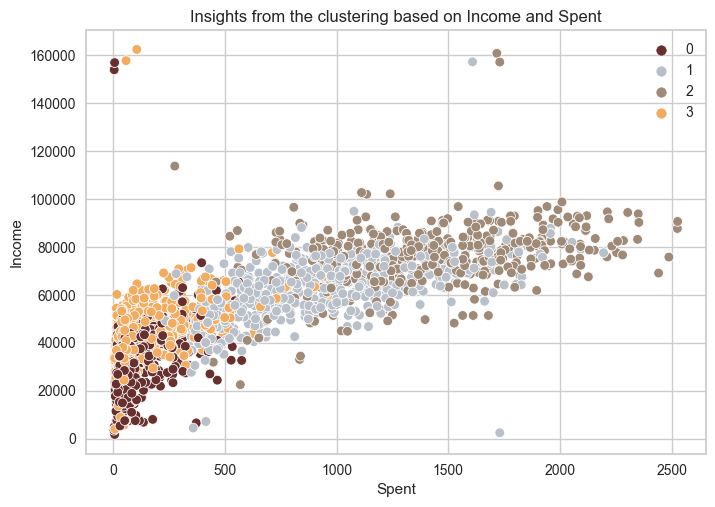

In [342]:
pl = sns.scatterplot(data=data, x=data['Spent'], y=data['Income'], hue=data['Clusters'], palette=pallet)
pl.set_title("Insights from the clustering based on Income and Spent")
pl.legend()
plt.show()

* group 0: low spending & low income
* group 1: high spending & average income
* group 2: high spending & high income
* group 3: high spending & low income

In [343]:
def show_plots(clusters):
    for _ in range(0, clusters+1):
        pl = sns.scatterplot(data=data, x=data[data['Clusters']==_]['Spent'], y=data[data['Clusters']==_]['Income'], hue=data['Clusters'], palette=pallet)
        pl.set_title("Insights from the clustering based on Income and Spent")
        pl.legend()
        plt.show()

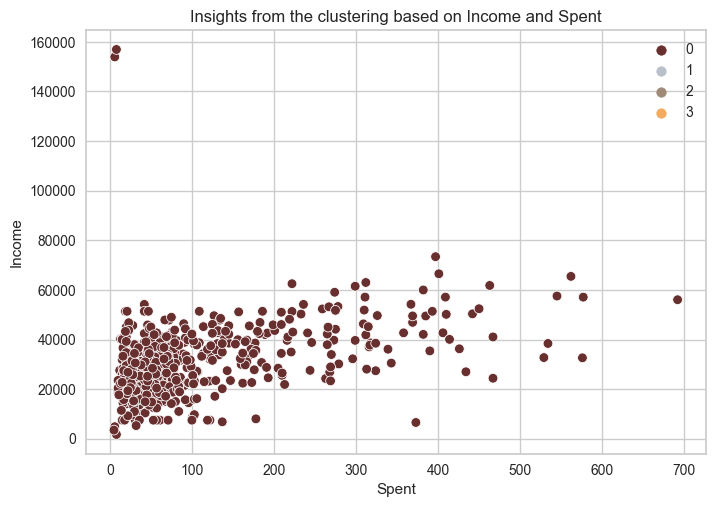

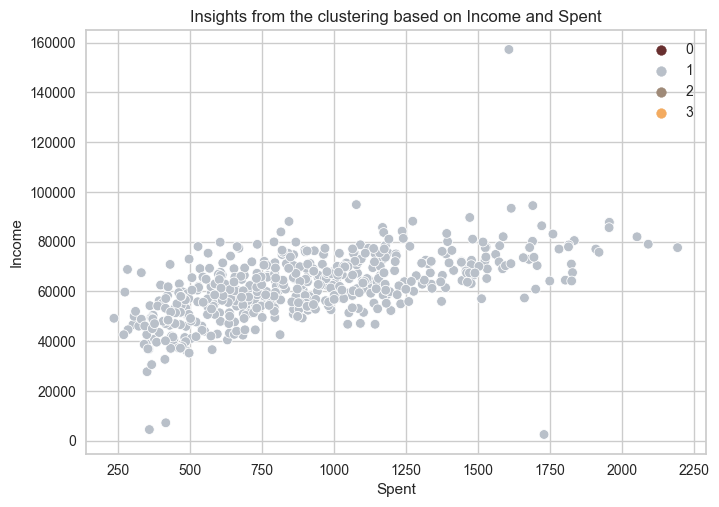

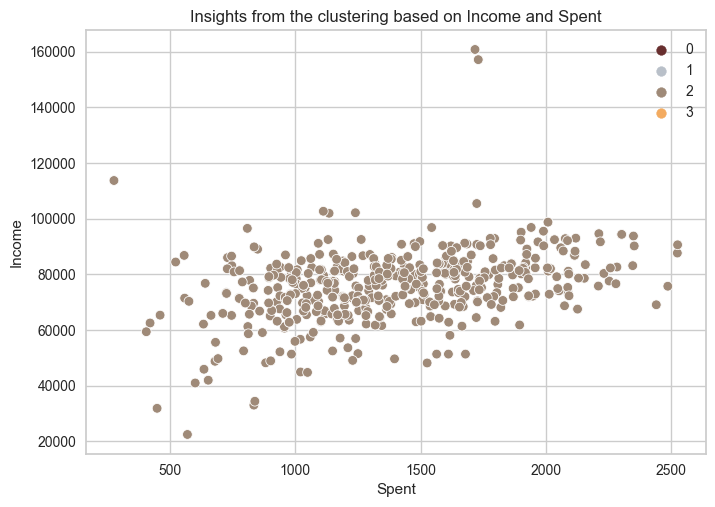

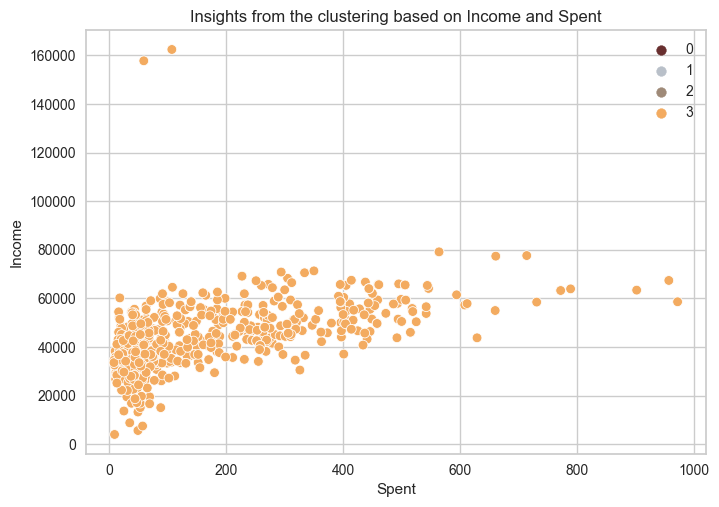

In [344]:
show_plots(3)

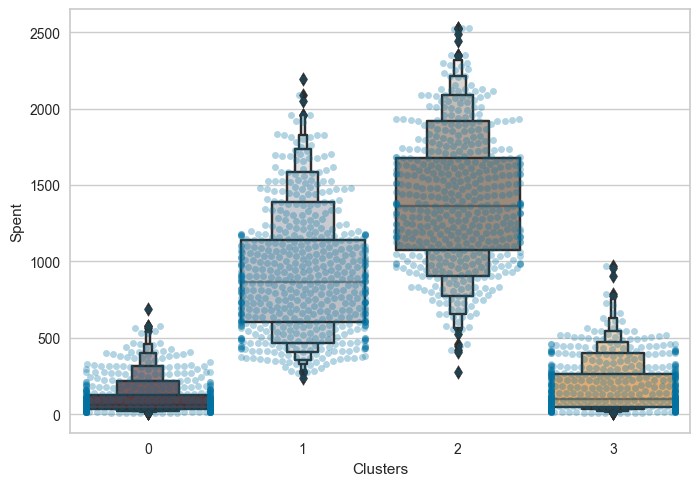

In [345]:
plt.figure()
pl = sns.swarmplot(x=data['Clusters'], y=data['Spent'], alpha=0.3)
pl = sns.boxenplot(x=data['Clusters'], y=data['Spent'], palette=pallet)
plt.show()

### We get that our customers clustered as 2 have spent more than others. We can explore what each cluster is spending on for the targeted marketing strategies.

* Let's see that our clusters (customers) accepted how many campaigns

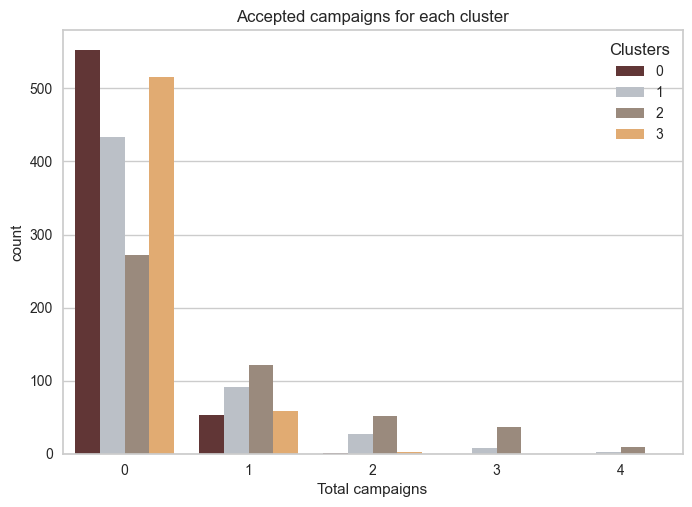

In [346]:
# create a feature to see the total campaigns that each cluster accepted
data['Total_campaigns'] = data['AcceptedCampaign16']+data['AcceptedCampaign17']+data['AcceptedCampaign18']+data['AcceptedCampaign19']+data['AcceptedCampaign20']

# Plotting the total campaigns with clusters
plt.figure()
pl = sns.countplot(x=data['Total_campaigns'], hue=data['Clusters'], palette=pallet)
pl.set_title('Accepted campaigns for each cluster')
pl.set_xlabel('Total campaigns')
plt.show()

### At the end we analized that our customers whose spending is low and whose income is low are not accepting the most of the campaigns we should take control for these customers